In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

from xgboost import XGBClassifier
from xgboost import plot_importance

import category_encoders as ce

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#check duplicate
df.duplicated().sum()

0

In [6]:
#check missing value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [8]:
#fill Nan age data by age mean
df.describe()  
select = 'Age'  #choose column
#add mean into blank only in column Income
df[select] = df[select].fillna(df[select].mean())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [9]:
#fill NAN embarked 
df['Embarked'] = df['Embarked'].fillna(method='pad')

In [10]:
#drop cabin 
df = df.drop(['Cabin'],axis=1)
df = df.drop(['PassengerId'], axis=1)
df = df.drop(['Name'],axis=1)

In [11]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.000000,1,0,113803,53.1000,S
4,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,S
887,1,1,female,19.000000,0,0,112053,30.0000,S
888,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.000000,0,0,111369,30.0000,C


In [12]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [15]:
df['Embarked'].value_counts()

S    644
C    169
Q     78
Name: Embarked, dtype: int64

In [16]:
df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [17]:
# split data into training and testing sets
x = df.drop(['Survived'], axis=1)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
x_train.shape, x_test.shape

((623, 8), (268, 8))

In [18]:
x_train.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [19]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
445,1,male,4.000000,0,2,33638,81.8583,S
650,3,male,29.699118,0,0,349221,7.8958,S
172,3,female,1.000000,1,1,347742,11.1333,S
450,2,male,36.000000,1,2,C.A. 34651,27.7500,S
314,2,male,43.000000,1,1,F.C.C. 13529,26.2500,S


In [20]:
#Encoder
encoder = ce.OrdinalEncoder(cols=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket','Fare','Embarked'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

C:\Users\Maytawee J\anaconda3\envs\Maytawee\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [21]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
445,1,1,1,1,1,1,1,1
650,2,1,2,1,2,2,2,1
172,2,2,3,2,3,3,3,1
450,3,1,4,2,1,4,4,1
314,3,1,5,2,3,5,5,1
...,...,...,...,...,...,...,...,...
106,2,2,18,1,2,493,21,1
270,1,1,2,1,2,494,206,1
860,2,1,34,3,2,495,207,1
435,1,2,52,2,1,419,192,1


In [22]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
709,2,1,2.0,2,3,-1.0,24.0,2
439,3,1,7.0,1,2,-1.0,34.0,1
840,2,1,12.0,1,2,-1.0,25.0,1
720,3,2,71.0,1,3,253.0,146.0,1
39,2,2,52.0,2,2,169.0,110.0,2


# Decision Tree

In [23]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8171641791044776


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       157
           1       0.85      0.68      0.75       111

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.80       268
weighted avg       0.82      0.82      0.81       268



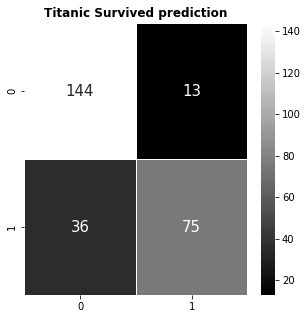

In [28]:
#Confusion matrix for Fashion MNIST
con_mat=confusion_matrix(y_test,y_pred)
plt.style.use('seaborn-deep')
plt.figure(figsize=(5,5))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('Titanic Survived prediction',fontweight='bold',fontsize=12)
plt.show()

# Random Forest

In [37]:
# instantiate the classifier 
rfc = RandomForestClassifier(n_estimators=100,random_state=0)
# fit the model
rfc.fit(x_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(x_test)

In [38]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7686567164179104


In [42]:
#feature score
feature_scores = pd.Series(clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

Sex         0.555821
Pclass      0.259831
Ticket      0.049694
Fare        0.045940
Embarked    0.037800
Age         0.035375
Parch       0.015539
SibSp       0.000000
dtype: float64

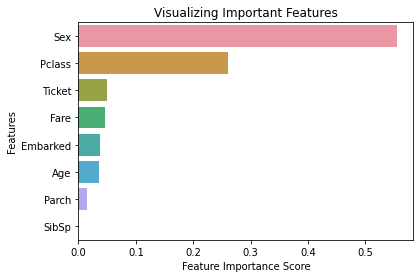

In [43]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [46]:
X = df.drop(['Survived','SibSp'], axis=1)
y = df['Survived']

In [47]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [48]:
#Encoder
encoder = ce.OrdinalEncoder(cols=['Pclass', 'Sex', 'Age', 'Parch', 'Ticket','Fare','Embarked'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

C:\Users\Maytawee J\anaconda3\envs\Maytawee\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [56]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100,random_state=0)
# fit the model to the training set
clf.fit(x_train, y_train)
# Predict on the test set results
y_pred = clf.predict(x_test)

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7686567164179104


In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       157
           1       0.72      0.73      0.72       111

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



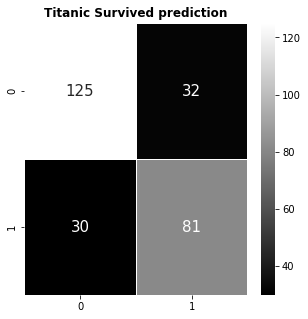

In [59]:
#Confusion matrix for Fashion MNIST
con_mat=confusion_matrix(y_test,y_pred)
plt.style.use('seaborn-deep')
plt.figure(figsize=(5,5))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('Titanic Survived prediction',fontweight='bold',fontsize=12)
plt.show()

# XGBoost

In [60]:
from xgboost import XGBClassifier
from xgboost import plot_importance
xgb = XGBClassifier(learning_rate=0.1,
                      n_estimators=100,         
                      max_depth=4,               
                      min_child_weight = 1,      
                      gamma=0.,                  
                      subsample=0.8,             
                      colsample_btree=0.8,       
                      # objective='multi:softmax' 指定损失函数
                      scale_pos_weight=1,        
                      random_state=0            
                   )
xgb=xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[17:27:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_btree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:27:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.746268656716418


C:\Users\Maytawee J\anaconda3\envs\Maytawee\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77       157
           1       0.66      0.79      0.72       111

    accuracy                           0.75       268
   macro avg       0.75      0.75      0.74       268
weighted avg       0.76      0.75      0.75       268



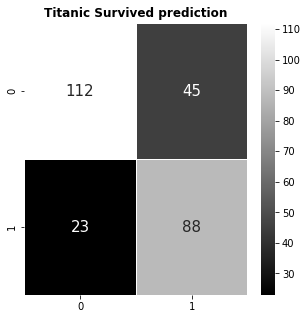

In [62]:
#Confusion matrix for Fashion MNIST
con_mat=confusion_matrix(y_test,y_pred)
plt.style.use('seaborn-deep')
plt.figure(figsize=(5,5))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('Titanic Survived prediction',fontweight='bold',fontsize=12)
plt.show()